# <div style="text-align: center"> Taller 3 </div>  
<div style="text-align: center"> Alejandro Alayón Suárez - 201316083</div>
___

In [1]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import pandas as pd
import numpy as np
import string
import matplotlib.cm as cm
import os
import scipy as sp
from scipy import ndimage

## <div style="text-align: justify"> 1. </div>  
___
En primer lugar se desarrolló una función la cual tiene como parámetros de entrada el nombre de una carpeta y el nombre de un archivo. Dicha función se encarga de convertir un archivo en formato _.VBO_ a un cuadro de datos el cual contiene las siguientes columnas:

* Altitud   [m]
* Latitud   [min]
* Longitud  [min]
* Tiempo    [s]
* Velocidad [m/s]  

El código de la función es expuesto a continuación:


In [2]:
def importdata(base_dir,data_file):
    
    with open(os.path.join(base_dir,data_file), 'r') as vboxdata:
        section = []
        time = []
        lat = []
        long = []
        vel = []
        height = []
        vertv = []
        for line in vboxdata:
            if line[0] == '[':
                section = str.replace(line, "\n","")
                continue
            if section == '[column names]':
                col_names = str.replace(line, "  \n","").split('  ')
                section = []
            if section == '[data]':
                linesplit = str.replace(line, " \n","").split(' ')
                time.append(float(linesplit[1][0:2])*3600+float(linesplit[1][2:4])*60+float(linesplit[1][4:]))
                lat.append(float(linesplit[2]))
                long.append(float(linesplit[3]))
                vel.append(float(linesplit[4]))
                height.append(float(linesplit[6]))
                vertv.append(float(linesplit[7]))
        
        
    time = np.asarray(time)
    lat = np.asarray(lat)
    long = np.asarray(long)
    vel = np.asarray(vel)*(1000/(60*60))
    height = np.asarray(height)
    vertv = np.asarray(vertv)
    time_base = time[0]
    time = time - time_base
    lat = lat/60.0
    long = -long/60.0
    dt = time[1]-time[0]
    
    reta={'Tiempo [s]':time,'Latitud [min]':lat,'Longitud [min]':long,'Velocidad [m/s]':vel,'Altitud [m]':height}
    ret=pd.DataFrame(data=reta)
    
    return ret

## <div style="text-align: justify"> 2. </div>  
___
Ahora bien, una vez la forma de importar los datos ha sido definida se puede proceder al análisis de los mismos, para esto se implementaron 3 funciones con el objetivo de extraer los datos sin procesar y llevarlos hasta instancias gráficas o de arreglos que sean comparables y coherentes entre si (tanto para el kart eléctrico como para el kart de combustión interna).   

La primera de ellas fue denominada _**Lap**_, esta mapea la posición del kart entre un tiempo inicial _$T_i$_ y un tiempo final _$T_f$_, retornando un mapa aproximado de la pista, la velocidad máxima del kart y el tiempo de vuelta en el intervalo elegido. La función recibe como parámetros un cuadro de datos, un tiempo inicial y un tiempo final, el código de la función es mostrado a continuación: 


In [4]:
def Lap(Data,Ti,Tf):
    data1=Data[(Data['Tiempo [s]']>=Ti)&(Data['Tiempo [s]']<=Tf)]
    plt.plot(data1['Longitud [min]'],data1['Latitud [min]'])
    plt.title('Mapeo de la vuelta')
    plt.axis('off')

    return print('El tiempo de vuelta es de',Tf-Ti,'[s]', 'y la velocidad máxima alcanzada es de', round(max(data1['Velocidad [m/s]']),2),'[m/s]') , plt.show();

La segunda función fue denominada _**velfilt**_, esta realiza un filtrado gaussiano de orden 0 y $\sigma=20$ a los datos de la velocidad en un intervalo de tiempo establecido, así retornando un arreglo de las velocidades filtradas. Los parámetros de entrada son un cuadro de datos, un tiempo inicial y un tiempo final. El código de la función es expuesto a continuación:

In [238]:
def velfilt(Data,Ti,Tf):
    data1=Data[(Data['Tiempo [s]']>=Ti)&(Data['Tiempo [s]']<=Tf)]
    vfilt=ndimage.gaussian_filter1d(data1['Velocidad [m/s]'], sigma=20, order=0, mode='wrap')
    t=data1['Tiempo [s]']
    return t, vfilt


Finalmente, se implementó la función denominada _**acelfilt**_ la cual, dados un cuadro de datos y un intervalo de tiempo, realiza una derivación filtrada de la velocidad, así obteniendo un arreglo con los datos de la aceleración instantanea filtrada para el kart. El filtro es el mismo utilizado en la función anterior pero de orden 1. El código de la función puede ser apreciado a continuación:

In [224]:
def acelfilt(Data, Ti, Tf):
    data1=Data[(Data['Tiempo [s]']>=Ti)&(Data['Tiempo [s]']<=Tf)]
    dt=data1.iloc[1]['Tiempo [s]']-data1.iloc[0]['Tiempo [s]']
    a=ndimage.gaussian_filter1d(data1['Velocidad [m/s]'], sigma=20, order=1, mode='wrap') / dt
    t=data1['Tiempo [s]']
    return t, a

Utilizando las funciones anteriormente explicadas se analizaron los 16 archivos .VBO con el objetivo de encontrar los mejores tiempos de vuelta y las velocidades máximas en cada una de ellas. Este procedimiento se realizó iterativamente obteniendo el mejor resultado de vuelta para kart eléctrico y el mejor resultado de vuelta para el kart de combustión intera (tanto de tiempo de vuelta como de velocidad máxima). La función listada acontinuación es un asistente de graficación.

In [284]:
def graph(Data,Ti,Tf):
    a1=acelfilt(Data,Ti,Tf)
    v1=velfilt(Data,Ti,Tf)
    plt.subplot(211)
    plt.title('Gráficas de velocidad y aceleración')
    plt.ylabel('Velocidad [m/s]')
    plt.plot(v1[0],v1[1])
    plt.subplot(212)
    plt.ylabel('Aceleración [m/$s^2$]')
    plt.xlabel('Tiempo [s]')
    plt.plot(a1[0],a1[1])
    return plt.show()


### 2.1 Resultados de vuelta para el kart eléctrico

In [14]:
VBS52=importdata('data_electrico','VBS__052.VBO')

El tiempo de vuelta es de 136 [s] y la velocidad máxima alcanzada es de 19.31 [m/s]


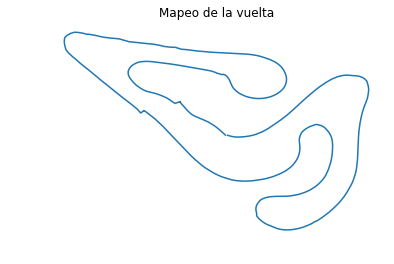

In [43]:
Lap(VBS52,776,912);

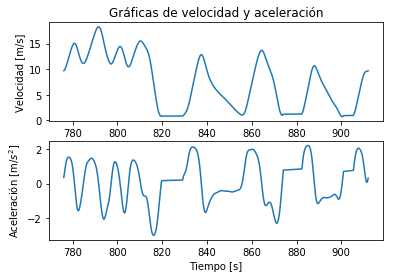

In [285]:
graph(VBS52,776,912)

El mejor tiempo de vuelta registrado para el kart eléctrico fue de 136 segundos, con una velocidad máxima de $18.28 m/s$, una aceleración máxima de $2.23 m/s^2$ y una desaceleración máxima de $-3.03 m/s^2$. Dichos resultados son reportados despues del filtro a los datos.

### 2.2 Resultados de vuelta para el kart de combustión interna

In [107]:
VBO20=importdata('Data','VBOX0020.VBO')

El tiempo de vuelta es de 54.5 [s] y la velocidad máxima alcanzada es de 25.49 [m/s]


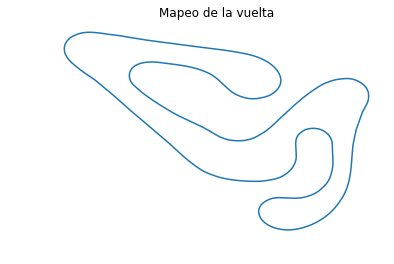

In [129]:
Lap(VBO20,75.5,130);

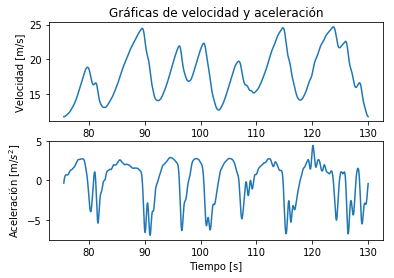

In [286]:
graph(VBO20,75.5,130)

El mejor tiempo de vuelta registrado para el kart de combustión interna fue de 54.5 segundos, con una velocidad máxima de $24.68 m/s$, una aceleración máxima de $4.41 m/s^2$ y una desaceleración máxima de $-6.93 m/s^2$. Dichos resultados son reportados despues del filtro a los datos.

### 2.3 Comparación de resultados

Tal como se aprecia en las gráficas mostradas anteriormente el desempeño del kart de combustión interna es significativamente superior a el de el kart eléctrico, esto debido a lo siguiente:

* El kart de combustión interna se demora 81.5 segundos menos que el kart eléctrico en terminar una vuelta.
* La velocidad máxima del kart de combustión interna es superior a la del kart eléctrico por $6.4 m/s$.
* La aceleración máxima del kart de combustión interna es superior a la del kart eléctrico por $2.2 m/s^2$.


## <div style="text-align: justify"> 3. </div>  
___

Con el objetivo de analizar el desempeño de los motores del kart eléctrico y su contraparte de combustión interna, se utilizaron las siguientes fórmulas basadas en el modelo cinemático del kart con rodadura variable dependiendo de la aceleración considerado en el Taller 2:

$T=\frac{r}{N_g\eta}[a(M+\frac{(I_w+I_d+I_eN_g^2)}{r^2}+0.01\frac{w}{g}(1+\frac{v_x}{100})\frac{h}{l})+0.01w(1+\frac{v_x}{100})\frac{A}{l}+D_A]$  

$\omega=\frac{vN_g}{r}$  

$P=\omega T$

Los principales parámetros que cambian entre el kart eléctrico y el de combusión interna son el peso y la relación de transmisión.

### 3.1 Parámetros del kart

In [291]:
g=9.81 #(m/s^2)
rho=1.1955 #Densidad del aire (kg/m^3)
masae=147 #Masa del kart eléctrico (kg)
masac=152 #Masa del kart C.I. (kg)
we=masae*g #Peso del kart eléctrico (N)
wc=masac*g #Peso del kart C.I. (N)
Cd=0.89 #Coeficiente de arrastre
dll= 0.975 #Distancia entre ejes de llantas traseras (m)
alj= 0.88 # Altura del kart con piloto de 1.68 m (m)
Af= dll*alj/2 #Area frontal (m^2)
a=0.2231 # Distancia del centro de gravedad al eje de la llanta trasera (m)
l=1.0063 # Distancia de eje de las llantas traseras y delanteras (m)
h=0.07478 # Altura del centro de gravedad del kart con respecto al piso (m)
nge=3.4 #Relación de transmisión del kart eléctrico
ngc=39/11 #Relación de transmisión del kart de C.I.
rll=0.139 #Radio geométrico de las llantas traseras (m)
refc=0.98*rll #Radio efectivo de las llantas traseras (m)
nu=0.95 #Eficiencia total de la transmisión
reje=0.02 # Radio eje de las llantas (m)
meje=3.832 # Masa del eje (kg)
ieje=(meje*reje**2)/2.0 # Inercia del eje de las llantas (kg-m^2)
ii=5.2E-3 # Inercia motor eléctrico (kg m^2)
mllt=1.43 # Masa llantas traseras (kg)
mlld=1.20 # Masa llantas delanteras (kg)
rlld=0.129 # Radio llantas delanteras (m)
rind=0.0631 # Radio rin llantas delanteras (m)
rin=0.0631 #radio interno del neumático (m)
mbt=0.7*mllt # El porcentaje de la masa total que pesa la parte "banda" de la llanta trasera
mdt=0.3*mllt # El porcentaje de la masa total que pesa la parte "disco" de la llanta trasera
mbd=0.7*mlld # El porcentaje de la masa total que pesa la parte "banda" de la llanta delantera
mdd=0.3*mlld # El porcentaje de la masa total que pesa la parte "disco" de la llanta delantera
illd=(mbd*rlld)+(mdd*(rlld**2-rind**2))/2 # Inercia 1 llanta delantera (kg-m^2)
illt=(mbt*rll)+(mdt*(rll**2-rin**2))/2 # Inercia 1 llanta trasera (kg-m^2)

### 3.2 Implementación de funciones auxiliares

Para poder extraer los datos de torque, velocidad angular y potencia fue necesaria la implementación de 3 funciones auxiliares, la primera de ellas, _**Fdrag**_ , fue extraida del taller anteior y clacula la fuerza de arrastre dada una velocidad. La segunda fue denominada _**Eparam y Cparam**_ (Eparam para el kart eléctrico y Cparam para el kart de combustión interna) esta se encarga de calcular el torque, la velocidad angular y la potencia, mediante la velocidad y la aceleración. Dicha función retorna un arreglo de tres columnas con aquellos resultados respectivamente. Finalmente, la función _**grpah2**_ es un ayudante de graficación.

In [401]:
def Fdrag(vel): 
    return 0.5*rho*Af*Cd*vel**2

def Eparam(vel,acel):
    
    beta=masae+((illt*2+ieje+ii*nge**2)/(refc**2))
    gama=(0.01*(1+(vel/100)))*we
    
    den=beta+(gama/g)*(h/l)
    
    T= ((acel*den+gama*(a/l)+Fdrag(vel))*refc)/(ng*nu)
    O=((vel*nge)/refc)
    P=T*O/1000
    
    return T,O,P

def Cparam(vel,acel):
    
    beta=masac+((illt*2+ieje+ii*ngc**2)/(refc**2))
    gama=(0.01*(1+(vel/100)))*wc
    
    den=beta+(gama/g)*(h/l)
    
    T= ((acel*den+gama*(a/l)+Fdrag(vel))*refc)/(ng*nu)
    O=((vel*ngc)/refc)
    P=T*O/1000
    
    return T,O,P

def graph2(Datae,Tie,Tfe,Datac,Tic,Tfc,TOP,ymax,ymin,nombrey):
    
    ae=acelfilt(Datae,Tie,Tfe)
    ve=velfilt(Datae,Tie,Tfe)
    ac=acelfilt(Datac,Tic,Tfc)
    vc=velfilt(Datac,Tic,Tfc)

    Ep=Eparam(ve[1],ae[1])
    Cp=Cparam(vc[1],ac[1])

    plt.subplot(121)
    plt.plot(ve[0],Ep[TOP])
    plt.ylabel(nombrey)
    plt.xlabel('Tiempo [s]')
    axes = plt.gca()
    axes.set_ylim([ymin,ymax])
    plt.title('Kart eléctrico')
    plt.subplot(122)
    plt.plot(vc[0],Cp[TOP])
    plt.xlabel('Tiempo [s]')
    axes = plt.gca()
    axes.set_ylim([ymin,ymax])
    plt.title('Kart de combustión interna')
    
    return plt.show()

Las gráficas comparativas para torque, velocidad angular y potencia son mostradas respectivamente a continuación:

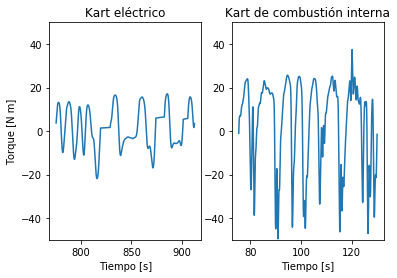

In [371]:
graph2(VBS52,776,912,VBO20,75.5,130,0,50,-50,'Torque [N m]')

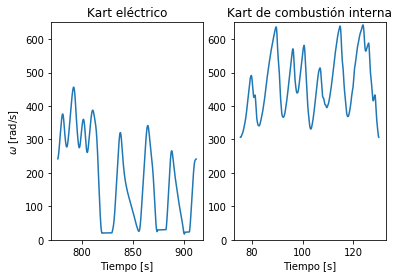

In [405]:
graph2(VBS52,776,912,VBO20,75.5,130,1,650,0,'$\omega$ [rad/s]')

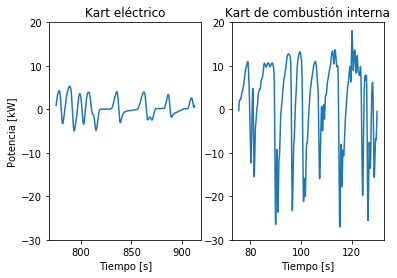

In [413]:
graph2(VBS52,776,912,VBO20,75.5,130,2,20,-30,'Potencia [kW]')

### 3.3 Análisis de resultados

Si se observan los 3 pares de gráficas mostrados anteriormente es fácilmente evidenciable que el desempeño del motor de combustión interna es superior para los tres parámetros analizados (torque, velocidad angular y potencia) ya que presenta valores maximos y medios superiores a los del motor eléctrico. Vale aclarar que para el torque y la potencia únicamente se deben tener en cuenta los valores positivos, ya que los negativos son causados por el frenado del kart en el transcurso de la vuelta.

Aunque los valores son significativamente diferentes no se puede decir que sean directamente comparables ya que las vueltas fueron realizadas con condiciones significativamente diferentes. En primer lugar el piloto no fue el mismo, lo que puede llevar a grandes irregularidades; en segundo lugar el día no fue el mismo, lo que implica que las condiciones ambientales pudieron haber sido ampliamente diferentes y finalmente, al no ser el mismo kart (en la gran mayoría de sus componentes) las condiciones mecánicas y de calidad de mantenimiento no fueron las mismas. Sin embargo, como una aproximación se puede decir que el desempeño del kart de combustión interna era mejor.

## <div style="text-align: justify"> 4. </div>  
___

Tal como se analizó en el taller pasado existen multiples formas de mejorar el rendimiento del kart eléctrico, entre ellas se encuentran: disminuir la masa total del kart + piloto, aumentar la relación de transmisión y mejorar el perfíl aerodinámico del chasis para disminuir el arrastre. Sin embargo, dichas mejoras afectan marginalmente el desempeño del kart, el verdadero factor influenciador es el motor eléctrico y la calidad de manufactura de el kart en general.

Como recomendación se sugiere sustituir el motor eléctrico por uno de mayor potencia y robustecer todos los componentes del kart con el objetivo de evitar deficiencias de energía (evidenciables en repentinos detenimientos del kart). Además, para realizar una comparación efectiva se debe normalizar las condiciones de las tomas de datos tales como el día, el piloto y el punto de partida.